In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

import os
import openai
import requests
from PIL import Image
import json

In [2]:
#openAi API authorization and check the available engines.
%env OPENAI_API_KEY=xxxx
#openai.organization = "yyyy"
openai.api_key = os.getenv('OPENAI_API_KEY')
#openai.Model.list()
headers = {
    'Authorization':'Bearer ' + openai.api_key
    }
result = requests.get('https://api.openai.com/v1/engines', headers=headers)
#print(result.json())

env: OPENAI_API_KEY=xxxx


original:


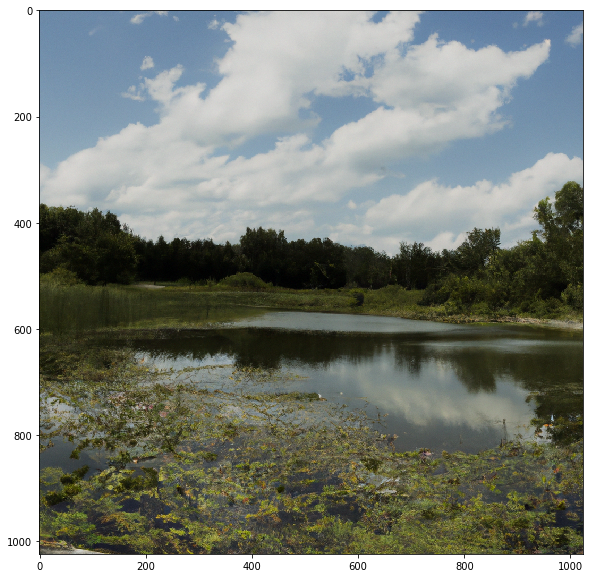

Variant  0 :


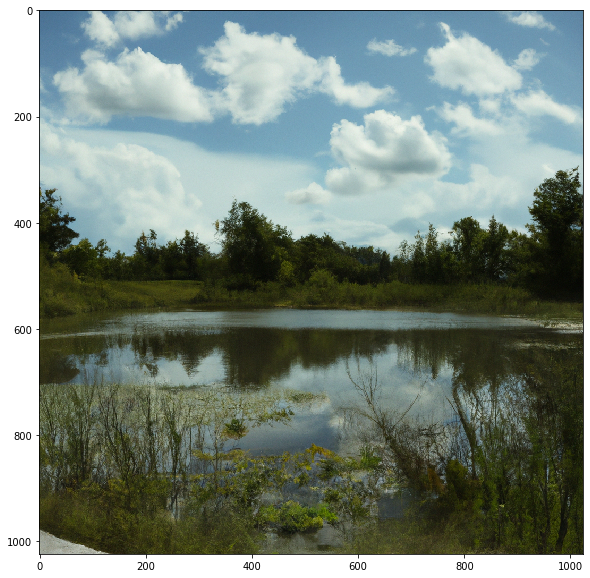

Variant  1 :


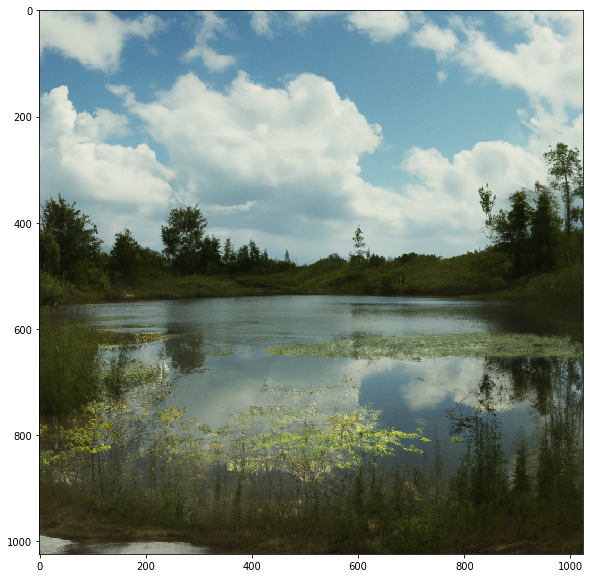

In [16]:
#Plot original image and the variations of same.
rcParams['figure.figsize'] = 14, 10
p_size = "1024x1024"
image_subject = 'a lake'
response = openai.Image.create(
  prompt=image_subject,
  n=1,
  size=p_size
)
image_url = response['data'][0]['url']
im = Image.open(requests.get(image_url, stream=True).raw)
print('original:')
plt.imshow(im)
plt.show()

image_save = image_subject+'.png'
im.save(image_save)
picts = 2
img_response = openai.Image.create_variation(
  image=open(image_save, "rb"),
  n=picts,
  size=p_size
)

for i in range(0,picts):
    print('Variant',i,':')
    Im = requests.get(img_response['data'][i]['url'], stream=True)
    img = Image.open(Im.raw)
    plt.imshow(img)
    plt.show()